In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from googleapiclient.discovery import build
from dotenv import load_dotenv
from channel_ID import CHANNEL_ID



In [22]:
## load enviroment variables from the .env files
load_dotenv()

True

In [23]:
## get the api key from the .env file
api_key = os.getenv("api_key")

In [24]:
## create a youtube api client
youtube = build('youtube', 'v3', developerKey=api_key)

In [25]:
## function to fetch the channel data for a given channel id and youtube api key

def channel_data(api_key, channel_id):
    all_data = []

    request = youtube.channels().list(
        part = 'snippet, contentDetails, statistics',
        id = ','.join(channel_id)
    )
    response = request.execute()
    for i in range(len(response['items'])):
        data = dict(channel_title = response['items'][i]['snippet']['title'],
                    created_date = response['items'][i]['snippet']['publishedAt'],
                    subscribers = response['items'][i]['statistics']['subscriberCount'],
                    total_videos = response['items'][i]['statistics']['videoCount'],
                    total_views = response['items'][i]['statistics']['viewCount'],
                    playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
        
        all_data.append(data)

    return all_data

In [26]:
## Calling the function to get the channel data and store it in a variable

channel_stat = channel_data(api_key,CHANNEL_ID)

channel_stat


[{'channel_title': 'Data Professor',
  'created_date': '2019-08-17T15:59:56Z',
  'subscribers': '198000',
  'total_videos': '353',
  'total_views': '7084528',
  'playlist_id': 'UUV8e2g4IWQqK71bbzGDEI4Q'},
 {'channel_title': 'CS Dojo',
  'created_date': '2016-02-26T01:49:30Z',
  'subscribers': '1950000',
  'total_videos': '111',
  'total_views': '82906468',
  'playlist_id': 'UUxX9wt5FWQUAAz4UrysqK9A'},
 {'channel_title': 'Two Minute Papers',
  'created_date': '2006-08-18T00:05:41Z',
  'subscribers': '1600000',
  'total_videos': '944',
  'total_views': '148770911',
  'playlist_id': 'UUbfYPyITQ-7l4upoX8nvctg'},
 {'channel_title': 'Simplilearn',
  'created_date': '2009-10-29T07:21:23Z',
  'subscribers': '4760000',
  'total_videos': '8629',
  'total_views': '412107714',
  'playlist_id': 'UUsvqVGtbbyHaMoevxPAq9Fg'},
 {'channel_title': 'Corey Schafer',
  'created_date': '2006-05-31T22:49:22Z',
  'subscribers': '1400000',
  'total_videos': '239',
  'total_views': '100054863',
  'playlist_id': 

In [27]:
## Coverting the channel data to a pandas dataframe

channel_stat_df = pd.DataFrame(channel_stat)

In [28]:
## checking the first five rows of the datafrmae
channel_stat_df.head()

,channel_title,created_date,subscribers,total_videos,total_views,playlist_id
0,Data Professor,2019-08-17T15:59:56Z,198000,353,7084528,UUV8e2g4IWQqK71bbzGDEI4Q
1,CS Dojo,2016-02-26T01:49:30Z,1950000,111,82906468,UUxX9wt5FWQUAAz4UrysqK9A
2,Two Minute Papers,2006-08-18T00:05:41Z,1600000,944,148770911,UUbfYPyITQ-7l4upoX8nvctg
3,Simplilearn,2009-10-29T07:21:23Z,4760000,8629,412107714,UUsvqVGtbbyHaMoevxPAq9Fg
4,Corey Schafer,2006-05-31T22:49:22Z,1400000,239,100054863,UUCezIgC97PvUuR4_gbFUs5g


In [29]:
## checking the infomations of the columns

channel_stat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   channel_title  15 non-null     object
 1   created_date   15 non-null     object
 2   subscribers    15 non-null     object
 3   total_videos   15 non-null     object
 4   total_views    15 non-null     object
 5   playlist_id    15 non-null     object
dtypes: object(6)
memory usage: 848.0+ bytes


In [30]:
channel_stat_df['created_date'].head()

0    2019-08-17T15:59:56Z
1    2016-02-26T01:49:30Z
2    2006-08-18T00:05:41Z
3    2009-10-29T07:21:23Z
4    2006-05-31T22:49:22Z
Name: created_date, dtype: object

In [31]:
## changing the date column to datetime format

## Dates are in ISO8601 format (like "2022-09-14T07:54:45.021008Z")
## "2022-09-14T07:54:45.021008Z" includes fractional seconds (.021008) and a "Z" to indicate UTC.

channel_stat_df['created_date'] = pd.to_datetime(channel_stat_df['created_date'], format='ISO8601').dt.date

In [32]:
channel_stat_df.head()

,channel_title,created_date,subscribers,total_videos,total_views,playlist_id
0,Data Professor,2019-08-17,198000,353,7084528,UUV8e2g4IWQqK71bbzGDEI4Q
1,CS Dojo,2016-02-26,1950000,111,82906468,UUxX9wt5FWQUAAz4UrysqK9A
2,Two Minute Papers,2006-08-18,1600000,944,148770911,UUbfYPyITQ-7l4upoX8nvctg
3,Simplilearn,2009-10-29,4760000,8629,412107714,UUsvqVGtbbyHaMoevxPAq9Fg
4,Corey Schafer,2006-05-31,1400000,239,100054863,UUCezIgC97PvUuR4_gbFUs5g


In [33]:
## Converting the subscriber, total_videos and total_views columns to integer data type

channel_stat_df['subscribers'] = channel_stat_df['subscribers'].astype(int)
channel_stat_df['total_videos'] = channel_stat_df['total_videos'].astype(int)
channel_stat_df['total_views'] = channel_stat_df['total_views'].astype(int)

In [34]:
## Creating a new column year to store the year of the channel creation 

channel_stat_df['year'] = pd.to_datetime(channel_stat_df['created_date']).dt.year

In [35]:
numerical_data = channel_stat_df[['subscribers','total_videos','total_views','year']]

correlation = numerical_data.corr()
correlation

,subscribers,total_videos,total_views,year
subscribers,1.000000,0.436942,0.969313,-0.034892
total_videos,0.436942,1.000000,0.426174,-0.258642
total_views,0.969313,0.426174,1.000000,0.032962
year,-0.034892,-0.258642,0.032962,1.000000


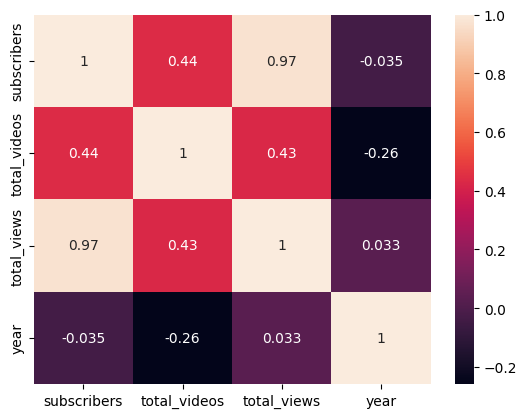

In [36]:
sns.heatmap(correlation, annot=True)
plt.show()

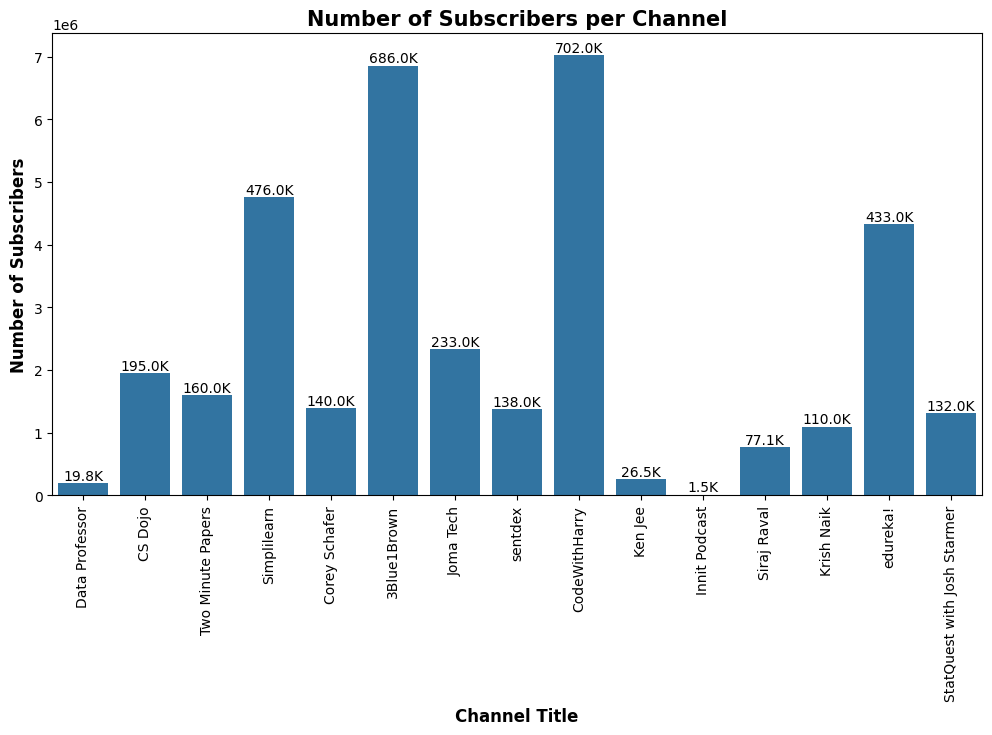

In [37]:
## number of subecribers per channel

plt.figure(figsize=(12,6))
ax = sns.barplot(x='channel_title', y='subscribers', data=channel_stat_df)
for p in ax.patches:
    label = f'{p.get_height() / 10000:.1f}K'
    ax.annotate(label, 
                (p.get_x()+ p.get_width()/2., p.get_height()), ha='center', 
                va='center', xytext=(0,5), textcoords='offset points')

plt.xticks(rotation=90)
plt.title('Number of Subscribers per Channel', fontsize=15, fontweight='bold')
plt.xlabel('Channel Title', fontsize=12, fontweight='bold')
plt.ylabel('Number of Subscribers', fontsize=12, fontweight='bold')
plt.show()

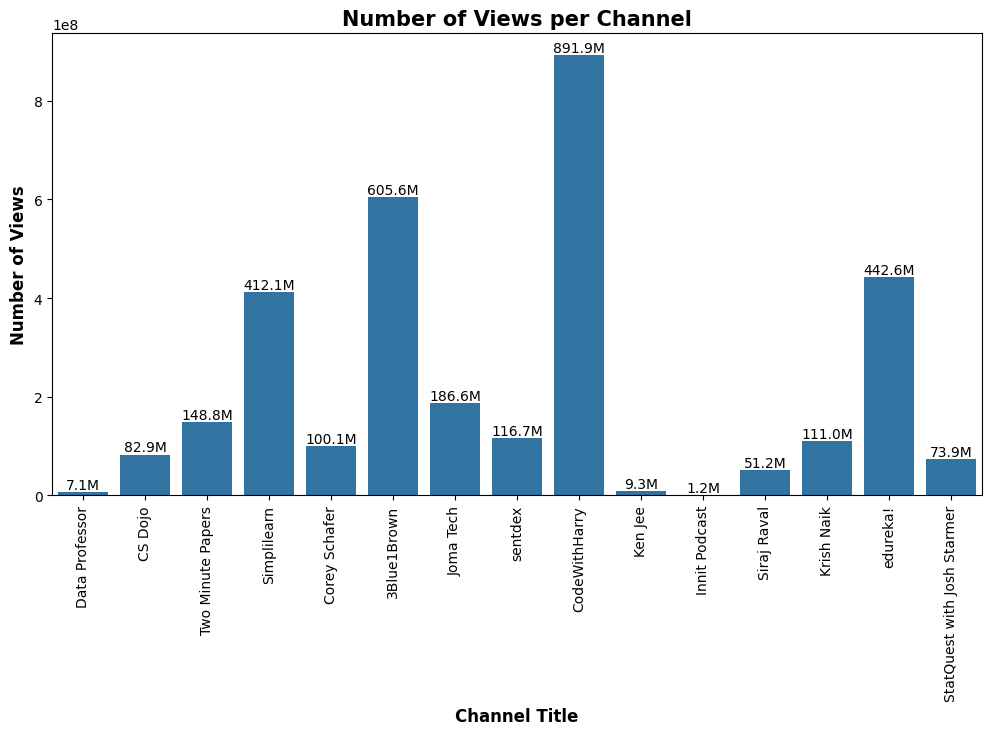

In [38]:
 ## Number of views per channel

plt.figure(figsize=(12,6))
ax = sns.barplot(x='channel_title', y='total_views', data=channel_stat_df)
for p in ax.patches:
    label = f'{p.get_height() / 1000000:.1f}M'
    ax.annotate(label, 
                (p.get_x()+ p.get_width()/2., p.get_height()), ha='center', 
                va='center', xytext=(0,5), textcoords='offset points')

plt.xticks(rotation=90)
plt.title('Number of Views per Channel', fontsize=15, fontweight='bold')
plt.xlabel('Channel Title', fontsize=12, fontweight='bold')
plt.ylabel('Number of Views', fontsize=12, fontweight='bold')
plt.show()

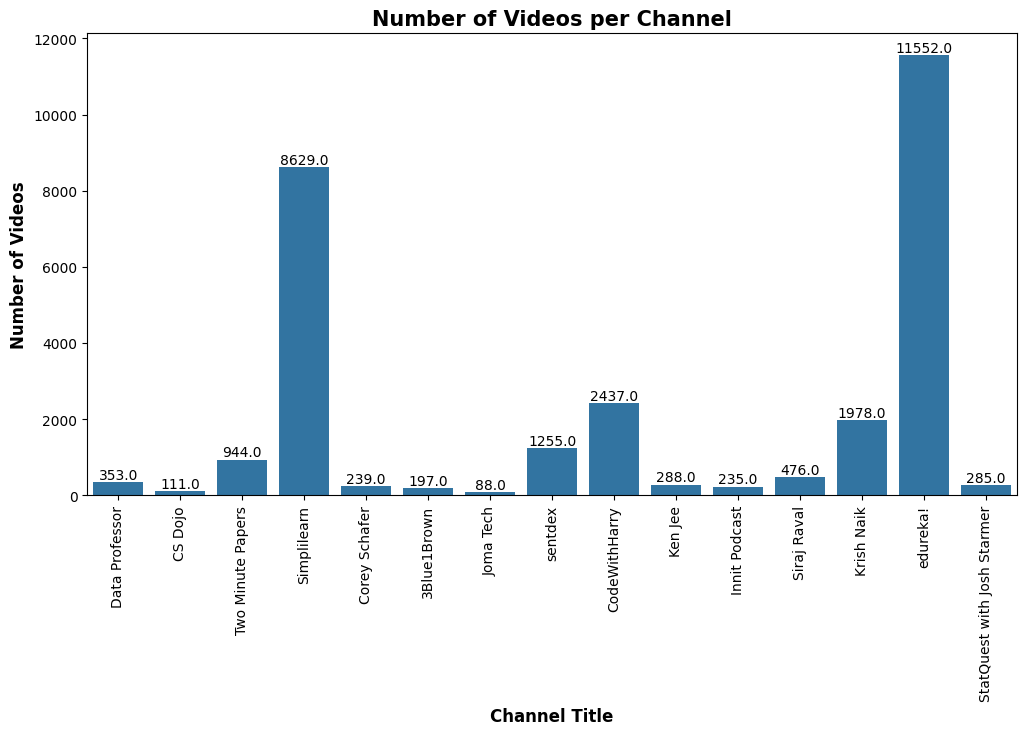

In [39]:
## number of videos per channel

plt.figure(figsize=(12,6))
ax = sns.barplot(x='channel_title', y='total_videos', data=channel_stat_df)
for p in ax.patches:
    label = f'{p.get_height()}'
    ax.annotate(label, 
                (p.get_x()+ p.get_width()/2., p.get_height()), ha='center', 
                va='center', xytext=(0,5), textcoords='offset points')

plt.xticks(rotation=90)
plt.title('Number of Videos per Channel', fontsize=15, fontweight='bold')
plt.xlabel('Channel Title', fontsize=12, fontweight='bold')
plt.ylabel('Number of Videos', fontsize=12, fontweight='bold')  
plt.show()  


In [40]:
channel_stat_df.head()

,channel_title,created_date,subscribers,total_videos,total_views,playlist_id,year
0,Data Professor,2019-08-17,198000,353,7084528,UUV8e2g4IWQqK71bbzGDEI4Q,2019
1,CS Dojo,2016-02-26,1950000,111,82906468,UUxX9wt5FWQUAAz4UrysqK9A,2016
2,Two Minute Papers,2006-08-18,1600000,944,148770911,UUbfYPyITQ-7l4upoX8nvctg,2006
3,Simplilearn,2009-10-29,4760000,8629,412107714,UUsvqVGtbbyHaMoevxPAq9Fg,2009
4,Corey Schafer,2006-05-31,1400000,239,100054863,UUCezIgC97PvUuR4_gbFUs5g,2006


In [41]:
harry = channel_stat_df['channel_title'] == "CodeWithHarry"

In [43]:
playlist_id = channel_stat_df[harry]['playlist_id'].iloc[0]

playlist_id

'UUeVMnSShP_Iviwkknt83cww'

In [44]:
## Function to extract the video id of all video uploaded in the channel.

def get_video_id(youtube, playlist_id):

    request = youtube.playlistItems().list(
        part = 'contentDetails',
        playlistId = playlist_id,
        maxResults = 50
    )

    response = request.execute()

    video_id = []

    for i in range(len(response['items'])):
        video_id.append(response['items'][i]['contentDetails']['videoId'])

    next_page_token = response.get('nextPageToken')
    more_pages = True

    while more_pages:
        if next_page_token:
            request = youtube.playlistItems().list(
                part = 'contentDetails',
                playlistId = playlist_id,
                maxResults = 50,
                pageToken = next_page_token
            )

            response = request.execute()

            for i in range(len(response['items'])):
                video_id.append(response['items'][i]['contentDetails']['videoId'])

            next_page_token = response.get('nextPageToken')

    return video_id



In [ ]:
video_ids = get_video_id(youtube, playlist_id)

In [ ]:
### Function to extractg the details from each of these videos


def get_video_details(youtube, video_ids):
    all_data = []

    for i in range(len(video_ids)):
        request = youtube.videos().list(
            part = 'snippet, statistics',
            id = video_ids[i]
        )

        response = request.execute()

        data = dict(video_id = video_ids[i],
                    title = response['items'][0]['snippet']['title'],
                    published_date = response['items'][0]['snippet']['publishedAt'],
                    views = response['items'][0]['statistics']['viewCount'],
                    likes = response['items'][0]['statistics']['likeCount'],
                    dislikes = response['items'][0]['statistics']['dislikeCount'],
                    comments = response['items'][0]['statistics']['commentCount'])

        all_data.append(data)

    return all_data

In [ ]:
video_details = get_video_details(youtube, video_ids)

In [ ]:
## Converting the video details to a pandas dataframe


video_details_df = pd.DataFrame(video_details)